In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv("heart-1.csv")

In [119]:
df.shape

(303, 14)

In [120]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [121]:
#first step to check whether data is balanced or not with the help of value counts

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [123]:
#info gives us five inferences: data type,memory storage,no. of rows,no. of cols,null values

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [124]:
#statistical summary of data : describe function

In [125]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

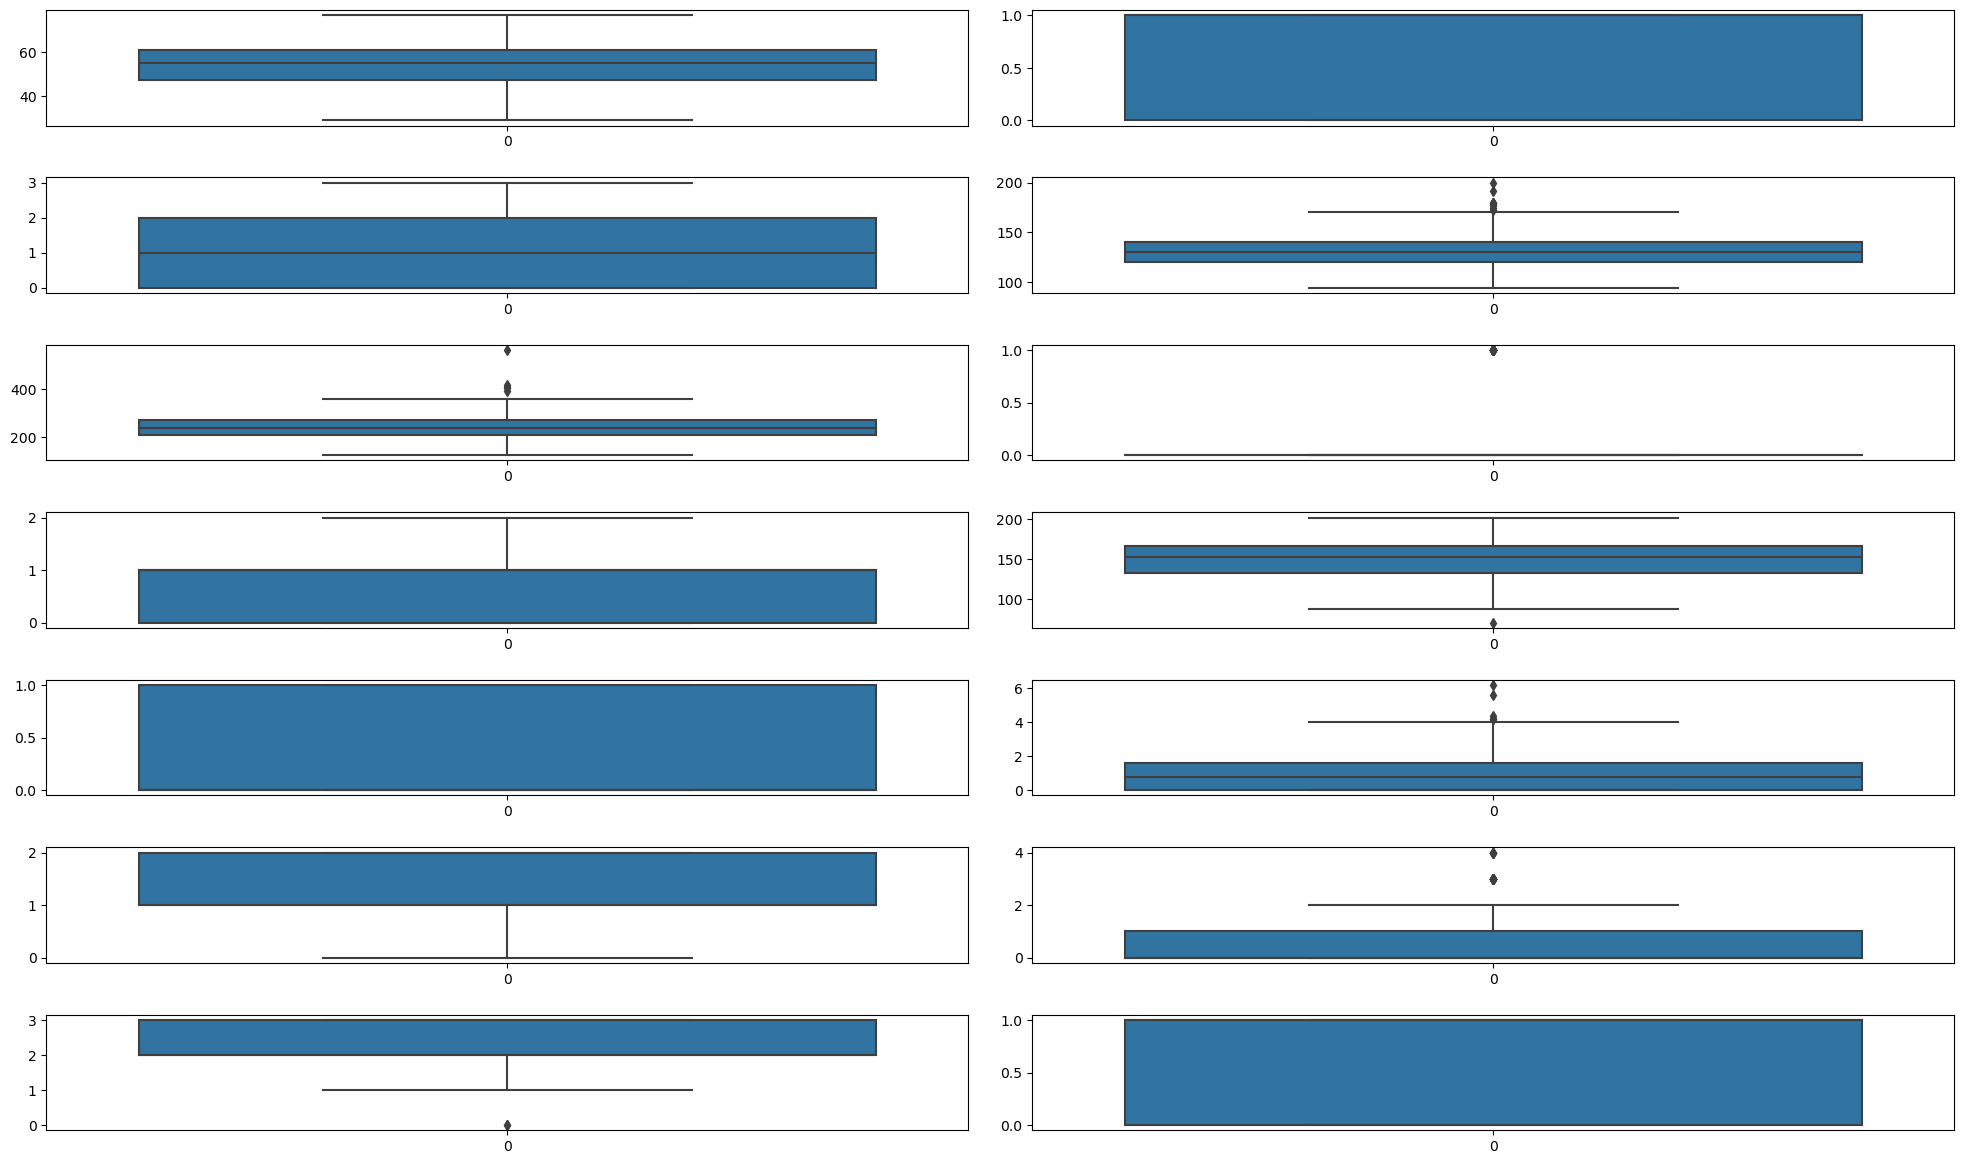

In [126]:
fig,ax = plt.subplots(nrows = 7, ncols = 2,figsize =(20,12))
for variable,subplot in zip(df.columns,ax.flatten()):
    sns.boxplot(df[variable],ax=subplot)
    plt.tight_layout(pad = 2,h_pad = 2)

plt.show()
    

In [127]:
import plotly.graph_objects as go
fig = go.Figure()
for i,variable in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[variable],name = variable,boxpoints = 'all',jitter = 0.5,whiskerwidth = 0.2,marker=dict(size = 2),line = dict(width = 1)))
    
fig.update_layout(
    title = 'boxplots for each variable',
    xaxis = dict(title = 'variable'),
    yaxis = dict(title = 'value'),
    height = 600,
    width = 800,
    showlegend = False)

fig.show()

In [128]:
df['sex'] = df.sex.map({0:'Female',1:'Male'})

In [129]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,Male,0,130,131,0,1,115,1,1.2,1,1,3,0


<Figure size 2000x3000 with 0 Axes>

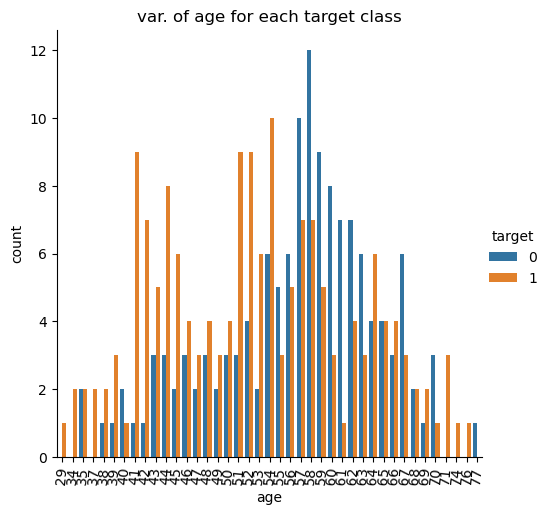

In [130]:
plt.figure(figsize = (20,30))
sns.catplot(kind = 'count',data = df,x = 'age',hue = 'target',order = df['age'].sort_values().unique())
plt.title('var. of age for each target class')
plt.xticks(rotation = 85)
plt.show()

In [131]:
import plotly.express as px
fig = px.histogram(df,x='age',color = 'target',barmode= 'group',title = 'var of age for each target class')
fig.update_layout(xaxis_title = 'age',yaxis_title = 'count',legend_title = 'Target',showlegend = True)
fig.show()

In [132]:
df['sex'] = df.sex.map({'Female': 0, 'Male': 1})

In [133]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [134]:
df_features = df.drop(['target'],axis = 1)
df_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [135]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(df_features,df['target'],test_size=0.2,random_state = 5)

In [136]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [137]:
#rescaling(feature selection or normalisation) the data: because after rescaling the data ,
#we get data in a particular range with less variations that makes calculations easy, to ensure
#all variables lie in a similar range, to sometimes avoid dominance as in when features have different
#scale some features may have larger dominant values over the smaller ones during the learning process 
#that can lead to bias results . handling larger units 

#standardization formula : x-u/sigma
#when we use normalisation # when we use standardization
# depends on use case
#normalisation min-max scaling in a range , sensitive to outliers
#when we want to center the features around the mean and less sensitive to outliers - standardization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(xtrain)
x_test = ss.transform(xtest)


In [138]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 10)
clf.fit(x_train,ytrain)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

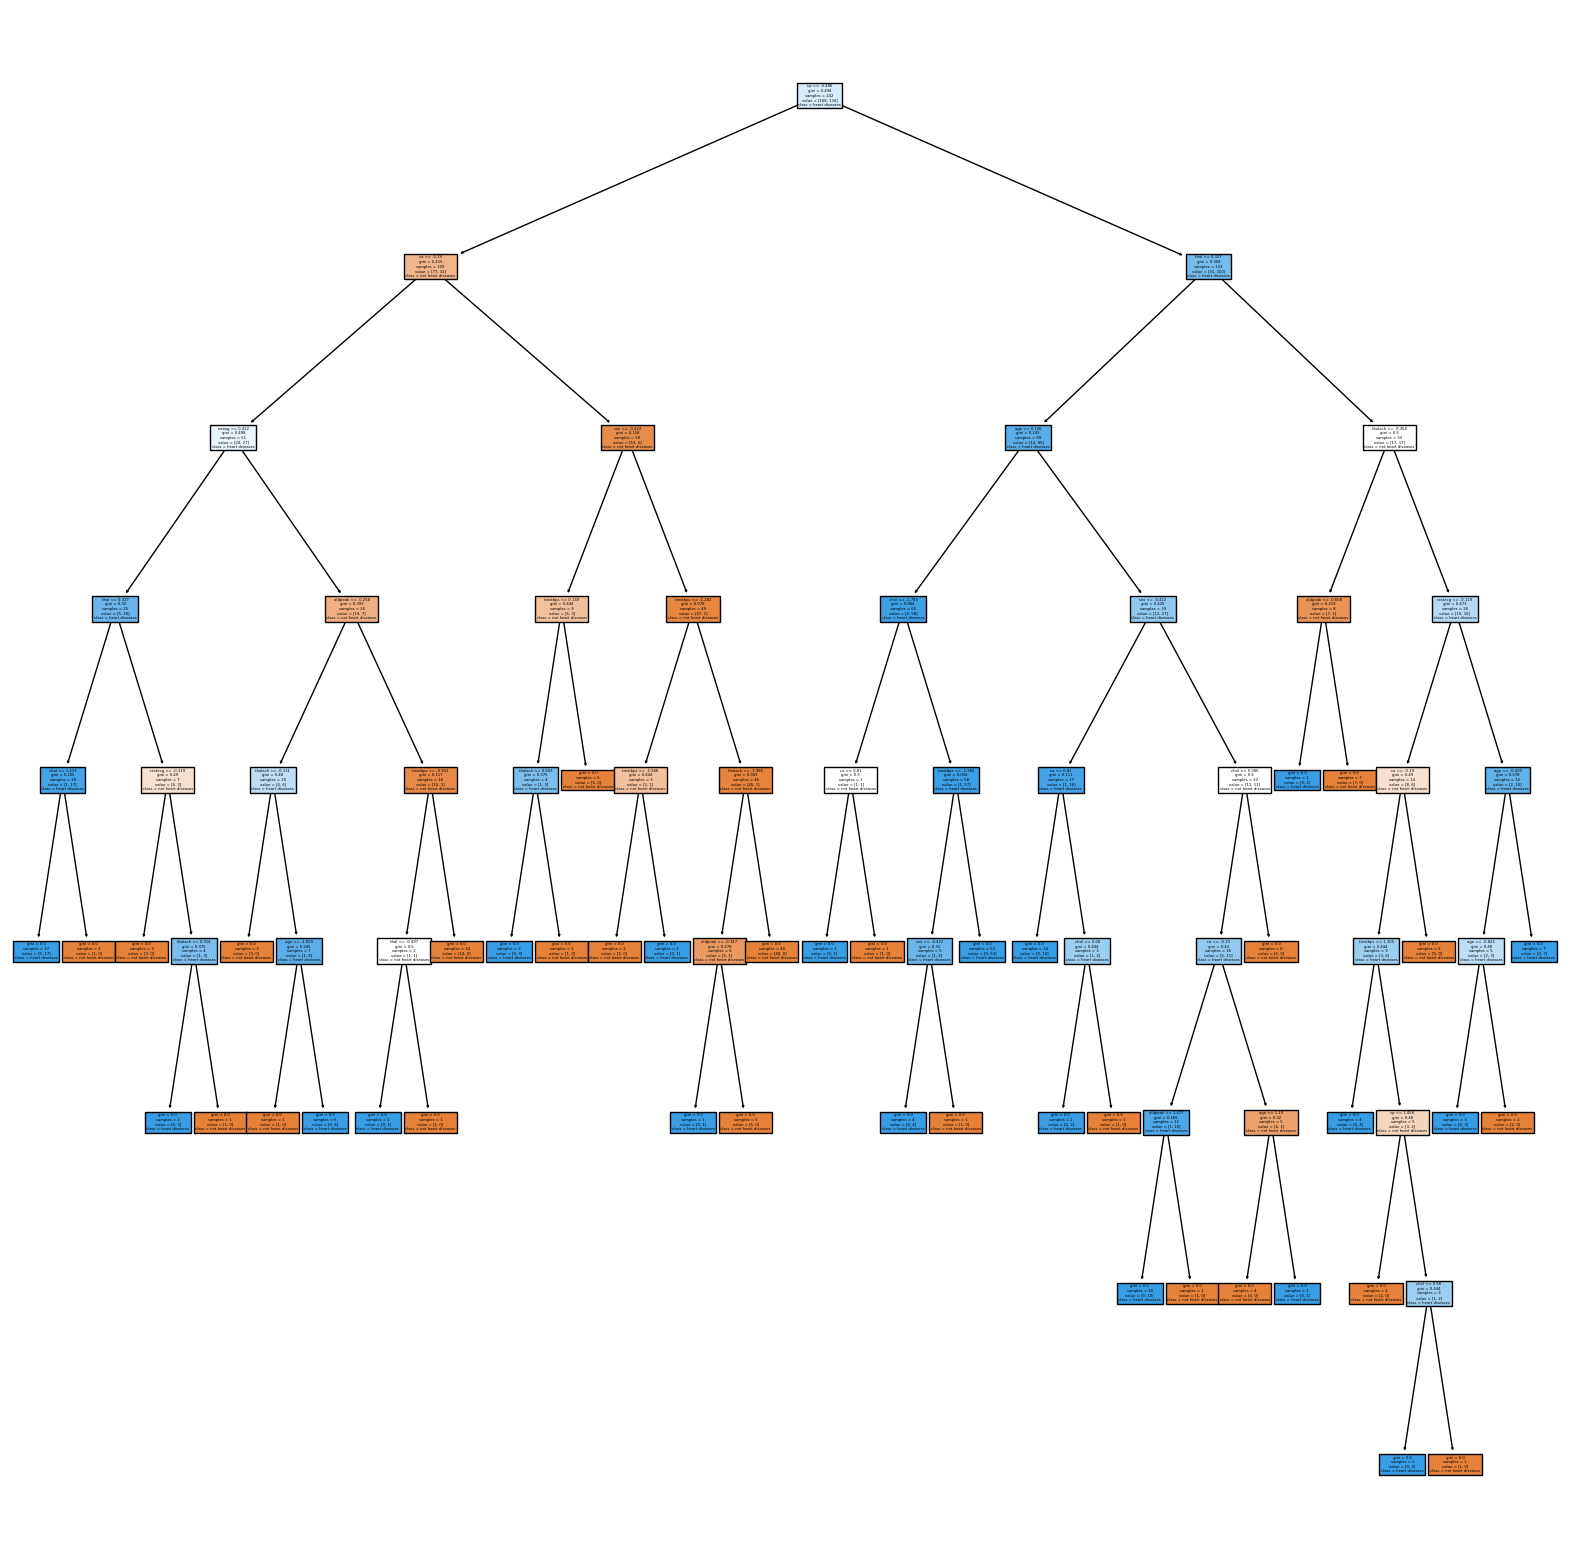

In [139]:
from sklearn import tree
plt.figure(figsize = (20,20))
features = df.columns
classes = ['not heart diseases','heart diseases']
tree.plot_tree(clf,feature_names=features,class_names = classes,filled = True)
plt.show()

In [140]:
from sklearn.metrics import *

In [141]:
accuracy_score(y_train_pred,ytrain)

1.0

In [142]:
accuracy_score(y_test_pred,ytest)

0.8032786885245902

In [145]:
#hyper parameter tuning

params = {
    'max_depth':[2,4,6,8,10,12],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2]
}

In [146]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf,param_grid = params)
gcv.fit(x_train,ytrain)
gcv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [148]:
model_gcv = gcv.best_estimator_
model_gcv.fit(x_train,ytrain)
y_train_pred = model_gcv.predict(x_train)
y_test_pred = model_gcv.predict(x_test)

In [149]:
accuracy_score(y_train_pred,ytrain)

0.8553719008264463

In [150]:
accuracy_score(y_test_pred,ytest)

0.8360655737704918